# Final Project - Checkpoint 1
## SARA_13
### Aman Thakur
### Sumiran Singh
### Atrey Khoche
### Vyom Thakkar

## SPAdes Assembly

### Input
```spades.py -o ../../../home/5440611/bioe131/FinalProject -1 ./SARA_13_S36_L004_R1_001.fastq.gz -2 ./SARA_13_S36_L004_R2_001.fastq.gz -t 1```

### Output
```
===== Assembling finished. Used k-mer sizes: 21, 33, 55 

 * Corrected reads are in /home/5440611/bioe131/FinalProject/corrected/
 * Assembled contigs are in /home/5440611/bioe131/FinalProject/contigs.fasta
 * Assembled scaffolds are in /home/5440611/bioe131/FinalProject/scaffolds.fasta
 * Paths in the assembly graph corresponding to the contigs are in /home/5440611/bioe131/FinalProject/contigs.paths
 * Paths in the assembly graph corresponding to the scaffolds are in /home/5440611/bioe131/FinalProject/scaffolds.paths
 * Assembly graph is in /home/5440611/bioe131/FinalProject/assembly_graph.fastg
 * Assembly graph in GFA format is in /home/5440611/bioe131/FinalProject/assembly_graph_with_scaffolds.gfa

======= SPAdes pipeline finished.
```

## Running assembly-stats

### Input
`assembly-stats contigs.fasta scaffolds.fasta`

### Output
```
stats for contigs.fasta
sum = 4936435, n = 434, ave = 11374.27, largest = 344672
N50 = 178051, n = 10
N60 = 142813, n = 14
N70 = 90461, n = 18
N80 = 61746, n = 24
N90 = 47039, n = 33
N100 = 56, n = 434
N_count = 0
Gaps = 0
-------------------------------------------------------------------------------
stats for scaffolds.fasta
sum = 4936976, n = 428, ave = 11534.99, largest = 403204
N50 = 178051, n = 10
N60 = 149228, n = 13
N70 = 142813, n = 16
N80 = 81294, n = 21
N90 = 47039, n = 29
N100 = 56, n = 428
N_count = 600
Gaps = 6
```

### Analysis of contigs
##### N50: 178051
##### Total number of contigs: 434
##### Total length: 4936435


### Analysis of scaffolds
##### N50: 178051
##### Total number of contigs: 428
##### Total length: 4936976

## Histogram of Contig Coverage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

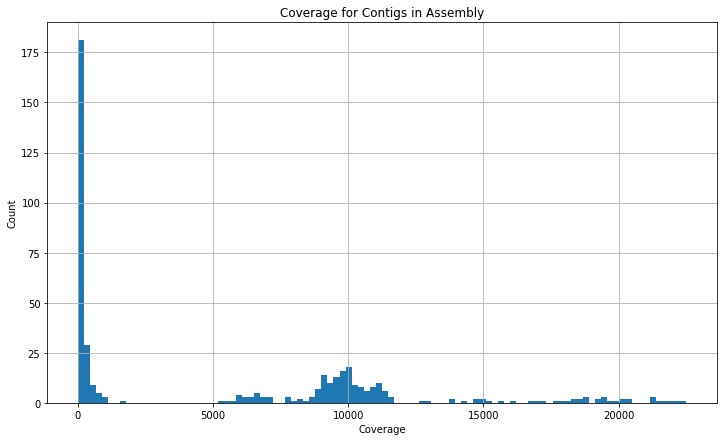

In [2]:
coverage_table = pd.read_csv('coverage.txt', header=None)
coverage_table.hist(column=0, bins=100, figsize=(12,7))
plt.xlabel('Coverage')
plt.ylabel('Count')
plt.title('Coverage for Contigs in Assembly')
plt.show()

### Average coverage length: 5455.782089525345

In [3]:
np.average(coverage_table[0])

5455.782089525345

The coverage looks bimodal, with one peak around 0 and one around 10000.

The coverage isn't uniform and could be gaussian, but isn't a great fit to a sum of gaussians.

## Locating 16s ribosomal RNA subunit (16s rRNA) genes

### Input
`rna_hmm3.py -i contigs.fasta -o ./output.GFF -L ./HMM3`

### Output
Outputted the 'output.GFF' file which I then modified to only contain information regarding 16s rRNA genes

## Extracting the nucleic acid sequence of 16s rRNA genes

### Input
`bedtools getfasta -fi ./contigs.fasta -bed ./output.GFF`

### Ouput
A FASTA sequence that I wrote to 'rRNA.fasta'.

## Running ribosomal RNA through SeqMatch

### Observations
It appears that this gene belongs to the species 'Salmonella enterica'. I came to this conclusion through the use of SeqMatch. The species estimate comes from the S_ab score that is calculated by SeqMatch for multiple species. 'Salmonella enterica' is a match for our strain.

## Genome Annotation
So far, we were only able to obtain the RAST annotations. Beyond the regular housekeeping genes, the major components of the annotated sequence are the genes that help with infection and genes that prevent degradation/attacks. The Phage portal (connector) protein gene likely helps the bacteria attach to a host cell. The penicillin-insensitive murein endopeptidase allows the bacteria to function even in the presence of penicillin, a powerful antibiotic. The phage packaged DNA stabilization protein might protect the bacteria against viruses. Finally, the Cold Shock protein might offer some resistance when subjugated to cold environments. Overall, this annotated genome provides a great benchmark into the possible functions of a Salmonella bacteria, but an RNA seq would allow us to go even further into understanding how the bacteria actually operates.  